In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("USA_Housing.csv")

print("Dataset Loaded Successfully")
df.head()

Dataset Loaded Successfully


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
print("Basic Info:")
df.info()

print("\nStatistical Summary:")
df.describe()

print("\nMissing Values:")
print(df.isnull().sum())

Basic Info:
<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   str    
dtypes: float64(6), str(1)
memory usage: 273.6 KB

Statistical Summary:

Missing Values:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [3]:
df = df.drop('Address', axis=1)


In [4]:
median_price = df['Price'].median()  #Median nikala

df['Price_Class'] = df['Price'].apply(         #Classify anything above median as 1 and below as 0
    lambda x: 1 if x > median_price else 0
)

df = df.drop('Price', axis=1)

print("Converted Price into Binary Target")      #Converted to classification ds
df.head()


Converted Price into Binary Target


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price_Class
0,79545.458574,5.682861,7.009188,4.09,23086.800503,0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1
2,61287.067179,5.865890,8.512727,5.13,36882.159400,0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1
4,59982.197226,5.040555,7.839388,4.23,26354.109472,0


In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

X = df.drop('Price_Class', axis=1)             #Drop price class from input bcz vo predict krna hai 
y = df['Price_Class']                          #Add it to op instead

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)             #.fit() mean and std dev niklta hai and transform applies the formula

print("Feature scaling completed.")


Feature scaling completed.


In [ ]:
from sklearn.model_selection import train_test_split       #TTS  70% and 30%

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=42                                         
)

print("Train-Test split done.")


Train-Test split done.


In [ ]:
from sklearn.linear_model import LogisticRegression     #inbuild LR model import and fitted

model = LogisticRegression()

model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


In [10]:
predictions = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, predictions))             #Performance stats

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.9053333333333333

Confusion Matrix:
[[664  67]
 [ 75 694]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       731
           1       0.91      0.90      0.91       769

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



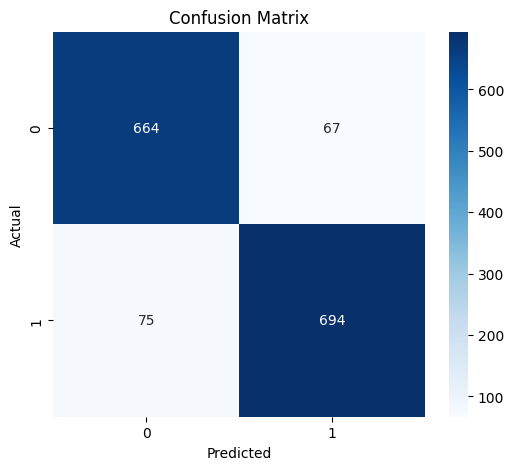

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, predictions),
            annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Q1: Why remove the Address column?**  
A: Because it is a string (text) feature, and logistic regression requires numeric input values.

**Q2: Why convert Price to binary?**  
A: Because logistic regression works on categorical targets, so we converted continuous price into High (1) and Low (0).

**Q3: Why is feature scaling required?**  
A: To ensure all features contribute equally to the model and prevent larger-scale features from dominating.

**Q4: Why use Logistic Regression instead of Linear Regression here?**  
A: Because we converted the problem into a classification task (High vs Low price), not a continuous prediction problem.

**Q5: What does the confusion matrix show?**  
A: It shows the number of correct and incorrect predictions made by the model for each class.
